# Libraries and Data Loading

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

## Data Loading

In [2]:
from openpyxl import load_workbook

def read_income_statement_data(file_path, sheet_name, cell_range):
    try:
        # Load the Excel file
        wb = load_workbook(file_path)
        sheet = wb[sheet_name]
        
        # Extract data from the specified cell range and convert it to a DataFrame
        data = [[cell.value for cell in row] for row in sheet[cell_range]]
        df = pd.DataFrame(data, columns=[f"Column_{i}" for i in range(1, len(data[0]) + 1)])
        
        print(df)
        
        # Convert DataFrame to a dictionary with "Column_1" as keys and "Column_2" as values
        income_statement_dict = df.set_index('Column_1')['Column_2'].to_dict()
        
        # Return the dictionary containing the data
        return income_statement_dict
    
    except Exception as e:
        print(f"Error occurred while reading data: {e}")
        return None

if __name__ == "__main__":
    file_path = r"E:\Personal Folder\Personal Projects\Python\Projects\Personal Projects\Income Statement\Data\LULULEMON ATHLETICA INC. - 10-K.xlsx"
    sheet_name = "INCOME_STATEMENT"
    cell_range = "B17:C29"
    
    income_statement_data = read_income_statement_data(file_path, sheet_name, cell_range)
    if income_statement_data is not None:
        # Multiply each value by 1000
        for key in income_statement_data:
            income_statement_data[key] *= 1000
        print(income_statement_data)
        # Perform further operations on the income_statement_data if needed


                                        Column_1  Column_2
0                                    Net revenue   8110518
1                             Cost of goods sold   3618178
2                                   Gross profit   4492340
3   Selling, general and administrative expenses   2757447
4              Amortization of intangible assets      8752
5        Impairment of goodwill and other assets    407913
6                   Acquisition-related expenses         0
7                     Gain on disposal of assets    -10180
8                         Income from operations   1328408
9                    Other income (expense), net      4163
10              Income before income tax expense   1332571
11                            Income tax expense    477771
12                                    Net income    854800
{'Net revenue': 8110518000, 'Cost of goods sold': 3618178000, 'Gross profit': 4492340000, 'Selling, general and administrative expenses': 2757447000, 'Amortization of intangi

# Sankey Diagram

## Data Loading
### Manually loading data from income statement data (dictionary format) above

In [3]:
income_statement_data = {
    'USA': 5654000000,
    'Canada': 1163000000,
    'China': 682000000,
    'World': 611000000,    
    'Net revenue': 8110518000,
    'Cost of goods sold': 3618178000,
    'Gross profit': 4492340000,
    'Selling, general and administrative expenses': 2757447000,
    'Amortization of intangible assets': 8752000,
    'Impairment of goodwill and other assets': 407913000,
    'Acquisition-related expenses': 0,
    'Gain on disposal of assets': -10180000,
    'Income from operations': 1328408000,
    'Other income (expense), net': 4163000,
    'Income before income tax expense': 1332571000,
    'Income tax expense': 477771000,
    'Net income': 854800000
}

## Visualization

In [4]:
label_list = list(income_statement_data.keys())
source = [0, 1, 2, 3, 11, 4, 4, 4, 4, 4, 15, 16]
target = [4, 4, 4, 4, 4, 6, 5, 7, 8, 9, 6, 6]
count = [5654000000, 1163000000, 682000000, 611000000, 10180000, 4492340000, 3618178000, 2757447000, 8752000, 407913000, 477771000, 854800000]

fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list},
    link = {"source": source, "target": target, "value": count}
    )])

fig.update_layout(
    title="Lululemon Economics Sankey Diagram",
    title_x=0.5,  # This value centers the title horizontally
    annotations=[
        dict(
            text="Source: Lululemon Investor Relations and 2022 Form 10-K",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=1,
            y=-0.2,
            xanchor="right",
            yanchor="bottom",
            font=dict(size=10),
        )
    ],
)

fig.show()

# Profitability Ratio Analysis
The Profitability ratio analysis involves assessing a company's financial health by examining ratios such as gross profit margin, net profit margin, and return on equity, which provide insights into its ability to generate profits relative to expenses and investments. 
This analysis is valuable for evaluating a company's efficiency and performance.

In [5]:
import pandas as pd

# Sample income statement data
income_statement_data = {
    'Year': [2022],  # Since we have one set of data, we'll consider it for one year
    'Net revenue': [8110518],
    'Cost of goods sold': [3618178],
    'Income from operations': [1328408],
    'Net Income': [854800]
}

# Create a DataFrame with 'Year' as the index
df = pd.DataFrame(income_statement_data)
df.set_index('Year', inplace=True)

# Calculate profitability ratios
df['GrossProfit'] = df['Net revenue'] - df['Cost of goods sold']
df['GrossProfitMargin'] = df['GrossProfit'] / df['Net revenue']
df['OperatingProfitMargin'] = df['Income from operations'] / df['Net revenue']
df['NetProfitMargin'] = df['Net Income'] / df['Net revenue']

# Display the DataFrame with profitability ratios
print(df)


      Net revenue  Cost of goods sold  Income from operations  Net Income  \
Year                                                                        
2022      8110518             3618178                 1328408      854800   

      GrossProfit  GrossProfitMargin  OperatingProfitMargin  NetProfitMargin  
Year                                                                          
2022      4492340           0.553891               0.163788         0.105394  


## Industry Benchmark Comparison
### Compare Lululemon's profitability ratios with industry benchmarks to assess its financial health and competitiveness.

In [6]:
# Given profitability ratios for Lululemon in 2022
lululemon_ratios = {
    'GrossProfitMargin': 0.553891,
    'OperatingProfitMargin': 0.163788,
    'NetProfitMargin': 0.105394
}

# Industry benchmark profitability ratios for Lululemon in 2022 (data obtained from ReadyRatio.com)
industry_benchmarks_2022 = {
    'GrossProfitMargin': 0.518000,
    'OperatingProfitMargin': 0.124000,
    'NetProfitMargin': 0.077000
}

# Calculate the differences between Lululemon's ratios and industry benchmarks for 2022
ratio_differences_2022 = {key: lululemon_ratios[key] - industry_benchmarks_2022[key] for key in lululemon_ratios}

# Display the ratio differences for 2022
for ratio, difference in ratio_differences_2022.items():
    print(f"{ratio}: Difference from Industry Benchmark (2022) = {difference:.6f}")

GrossProfitMargin: Difference from Industry Benchmark (2022) = 0.035891
OperatingProfitMargin: Difference from Industry Benchmark (2022) = 0.039788
NetProfitMargin: Difference from Industry Benchmark (2022) = 0.028394


As evident from the data, Lululemon's profitability ratios surpass those of the industry benchmarks. This signifies that Lululemon achieves a higher level of profitability compared to the typical companies within its sector. The most notable disparity emerges in the gross profit margin, exceeding the industry benchmark by 3.59%. Consequently, Lululemon effectively retains a larger portion of its sales as profit after accounting for the cost of goods sold.

These elevated profitability ratios might stem from various contributing factors, including:

1. Lululemon's robust brand identity and esteemed reputation.
2. The exceptional quality of its products.
3. Its dedicated emphasis on delivering exceptional customer service.
4. The optimization of its supply chain for efficiency.

Collectively, Lululemon's profitability ratios underscore its robust financial health and suggest that the company operates with adept management and strategic execution.

# Break-Even Analysis
The break-even analysis determines the point at which a business's total revenue equals its total costs, resulting in neither profit nor loss.

### Fixed and Variable Cost Calculation

In [7]:
income_statement_data = {
    'USA': 5654000000,
    'Canada': 1163000000,
    'China': 682000000,
    'World': 611000000,    
    'Net revenue': 8110518000,
    'Cost of goods sold': 3618178000,
    'Gross profit': 4492340000,
    'Selling, general and administrative expenses': 2757447000,
    'Amortization of intangible assets': 8752000,
    'Impairment of goodwill and other assets': 407913000,
    'Acquisition-related expenses': 0,
    'Gain on disposal of assets': -10180000,
    'Income from operations': 1328408000,
    'Other income (expense), net': 4163000,
    'Income before income tax expense': 1332571000,
    'Income tax expense': 477771000,
    'Net income': 854800000
}

# Define fixed cost categories
fixed_cost_categories = ['Amortization of intangible assets', 'Impairment of goodwill and other assets', 'Acquisition-related expenses']

# Define variable cost categories
variable_cost_categories = ['Cost of goods sold', 'Selling, general and administrative expenses', 'Income tax expense']

# Calculate total fixed costs
total_fixed_costs = sum(income_statement_data.get(category, 0) for category in fixed_cost_categories)

# Calculate total variable costs
total_variable_costs = sum(income_statement_data.get(category, 0) for category in variable_cost_categories)

# Display the total fixed costs and total variable costs
print(f"Total Fixed Costs: ${total_fixed_costs:,}")
print(f"Total Variable Costs: ${total_variable_costs:,}")

Total Fixed Costs: $416,665,000
Total Variable Costs: $6,853,396,000


Variable Costs:

Cost of goods sold (COGS): This includes expenses directly associated with the production of goods, and it can vary based on the level of production or sales.
Selling, general and administrative expenses (SG&A): These costs can include various operating expenses that can fluctuate based on business activities and decisions.
Income tax expense: This can vary depending on the company's profitability and tax rates.

Fixed Costs
Amortization of Intangible Assets: Amortization is the systematic allocation of the cost of intangible assets (such as patents, copyrights, trademarks) over their useful lives. The amortization expense is typically fixed over time and doesn't directly fluctuate with changes in production levels or business activities. It's a non-cash expense that reflects the gradual consumption of the asset's value.

Impairment of Goodwill and Other Assets: Impairment charges occur when the carrying value of an asset (like goodwill or other intangible assets) exceeds its recoverable amount. Impairment charges are generally not directly tied to production levels or business activities. They arise due to changes in market conditions or internal assessments and are treated as one-time or irregular events, making them more characteristic of fixed costs.

Acquisition-Related Expenses: These are costs incurred as a result of acquiring other companies or assets. These costs often include legal fees, consulting fees, and other expenses related to the acquisition process. They tend to be one-time or infrequent costs associated with strategic decisions and business expansion rather than directly linked to ongoing production levels.

### Analysis

In [8]:
def calculate_break_even(total_fixed_costs, variable_costs_per_unit, selling_price_per_unit):
    try:
        break_even_point = total_fixed_costs / (selling_price_per_unit - variable_costs_per_unit)
        return break_even_point
    except ZeroDivisionError:
        return "Selling price should be higher than variable costs per unit."

# Provide the necessary inputs
units_produced_2022 = 121500000 # assumed total production amount in 2022 based off 2021 (4,500,000) and 2020 (4,000,000) annual reports
total_variable_costs = 6853396000 # from calculation above
variable_costs_per_unit = total_variable_costs / units_produced_2022 # Variable costs per unit
selling_price_per_unit = 110  # Average selling price per unit

# Calculate the break-even point
break_even_point = calculate_break_even(total_fixed_costs, variable_costs_per_unit, selling_price_per_unit)

# Print the result
if isinstance(break_even_point, str):
    print(break_even_point)
else:
    print(f"The break-even point is {int(break_even_point):,} units.")


The break-even point is 7,774,551 units.


# Earnings Per Share (EPS) Trends Analysis
Analyzing the company's EPS over time to understand how the profitability per share has evolved
Combining this with stock price data to explore the relationship between financial performance and stock market reactions

## Data Loading for EPS Data

In [9]:
import pandas as pd

# Define the date range
start_date = '2019-01-01'
end_date = '2023-12-31'

# EPS data dictionary
eps_data = {
    2019: 4.31,
    2020: 4.94,
    2021: 4.5,
    2022: 7.49,
    2023: 6.68
}

# Convert dictionary to DataFrame
eps_df = pd.DataFrame.from_dict(eps_data, orient='index', columns=['EPS'])

# Convert the index to datetime format
eps_df.index = pd.to_datetime(eps_df.index, format='%Y')

# Change the index to December 31st of each year
eps_df.index = eps_df.index.map(lambda dt: dt.replace(month=12, day=31))

# Set the index column name to "Date"
eps_df.index.name = 'Date'

# Print the modified EPS DataFrame
print(eps_df)


             EPS
Date            
2019-12-31  4.31
2020-12-31  4.94
2021-12-31  4.50
2022-12-31  7.49
2023-12-31  6.68


The program uses Diluted EPS instead of basic EPS because it provides a more accurate picture of a company's profitability. Diluted EPS takes into account all potential dilution that could occur from stock-based compensation, warrants, convertible securities, and other dilutive instruments. 
Diluted EPS is more conservative than basic EPS, which means that it is less likely to be overstated.
Diluted EPS is the more commonly used measure of profitability by analysts and investors.

## Data Loading for Stock Data

In [10]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Lululemon
ticker_symbol = 'LULU'

# Define the years
years = [2019, 2020, 2021, 2022, 2023]

# Initialize an empty DataFrame to store the data
closing_prices = pd.DataFrame(columns=['Closing Price'])

# Pull closing stock price for each year
for year in years:
    # Set the start and end dates for the year
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    
    # Fetch historical data for the year
    lululemon = yf.Ticker(ticker_symbol)
    historical_data = lululemon.history(period='1d', start=start_date, end=end_date)
    
    # Check if data is available for the year
    if not historical_data.empty:
        closing_price = historical_data['Close'].iloc[-1]  # Get the closing price for the last trading day
        closing_prices.loc[f'{year}-12-31'] = closing_price

# Set the index column name to "Date"
closing_prices.index.name = 'Date'

# Convert the index to datetime format
closing_prices.index = pd.to_datetime(closing_prices.index)

# Print the closing prices DataFrame
print(closing_prices)


            Closing Price
Date                     
2019-12-31     230.830002
2020-12-31     350.779999
2021-12-31     398.690002
2022-12-31     320.380005
2023-12-31     378.760010


## Data Merging and Visualization

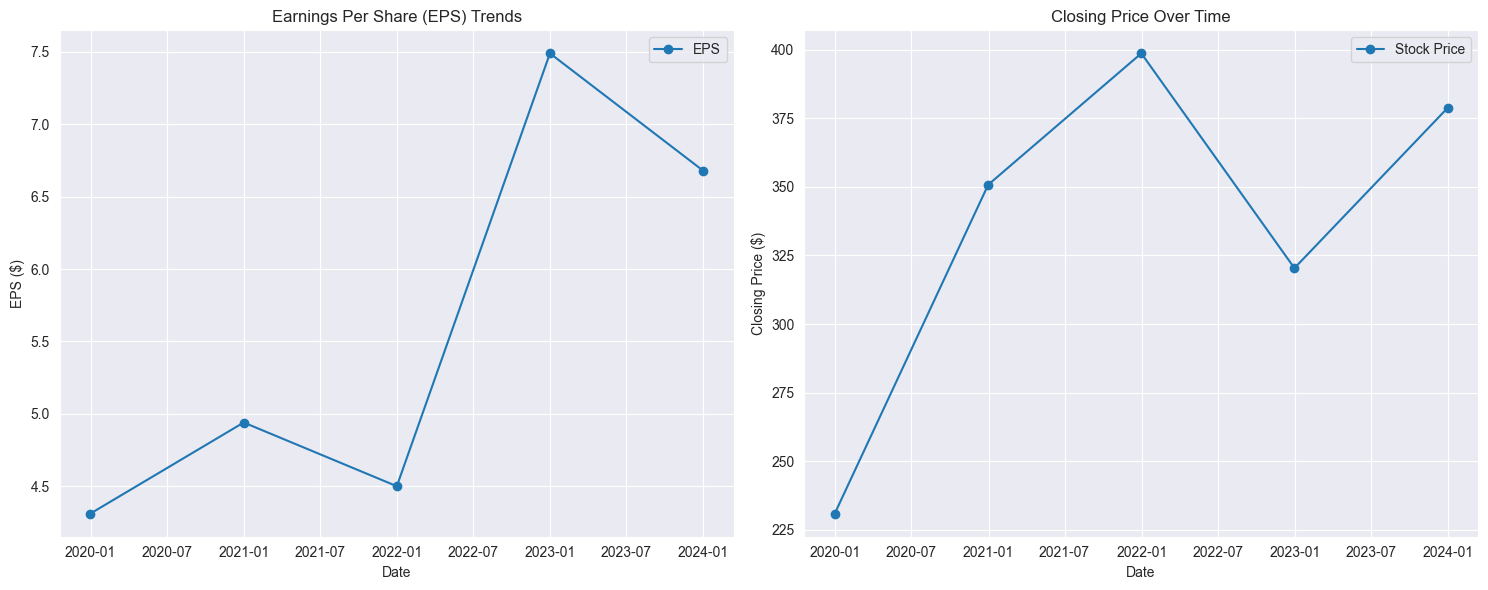

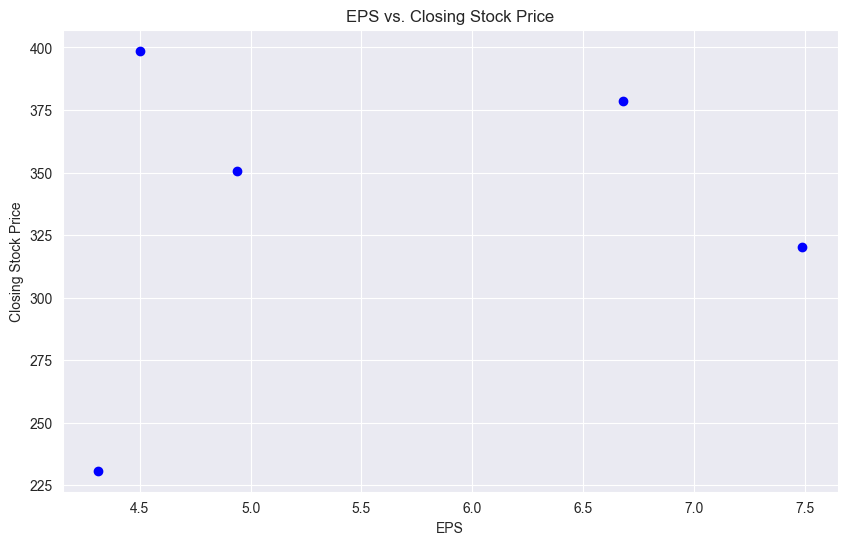

             EPS  Closing Price
Date                           
2019-12-31  4.31     230.830002
2020-12-31  4.94     350.779999
2021-12-31  4.50     398.690002
2022-12-31  7.49     320.380005
2023-12-31  6.68     378.760010


In [14]:
# Merge EPS and stock price data using the index column as the merging key
merged_data = pd.merge(eps_df, closing_prices, left_index=True, right_index=True)

# Convert 'Date' index to datetime format
merged_data.index = pd.to_datetime(merged_data.index)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot EPS trends over time on the left subplot
plt.subplot(1, 2, 1)
plt.plot(merged_data.index, merged_data['EPS'], marker='o', label='EPS')
plt.xlabel('Date')
plt.ylabel('EPS ($)')
plt.title('Earnings Per Share (EPS) Trends')
plt.legend()
plt.grid(True)

# Plot the closing stock price over time on the right subplot
plt.subplot(1, 2, 2)
plt.plot(merged_data.index, merged_data['Closing Price'], marker='o', label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Closing Price Over Time')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Plot the relationship between EPS and closing prices
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['EPS'], merged_data['Closing Price'], color='blue')
plt.xlabel('EPS')
plt.ylabel('Closing Stock Price')
plt.title('EPS vs. Closing Stock Price')
plt.grid(True)
plt.show()

The data suggests some interesting trends. For instance, there are fluctuations in both EPS and closing stock prices across the years. The EPS increased notably from 2019 to 2020, but then experienced a decrease in 2021 before experiencing a significant increase in 2022. The closing stock prices also show some variation, with the highest value in 2021 and fluctuations in other years.

There are a few possible explanations for this discrepancy between EPS and closing stock price. One possibility is that the market is not fully pricing in Lululemon's strong earnings growth. Another possibility is that investors are concerned about the company's future growth prospects. It is also possible that the recent decline in the stock market has also affected Lululemon's share price.

Overall, the data shows that Lululemon has been a profitable company in recent years. However, the stock price has not always reflected the company's earnings performance. Investors should carefully consider the company's future prospects before investing in its stock.

# Sensitivity Analysis
Assesses the impact of changes in key variables on a company's net income

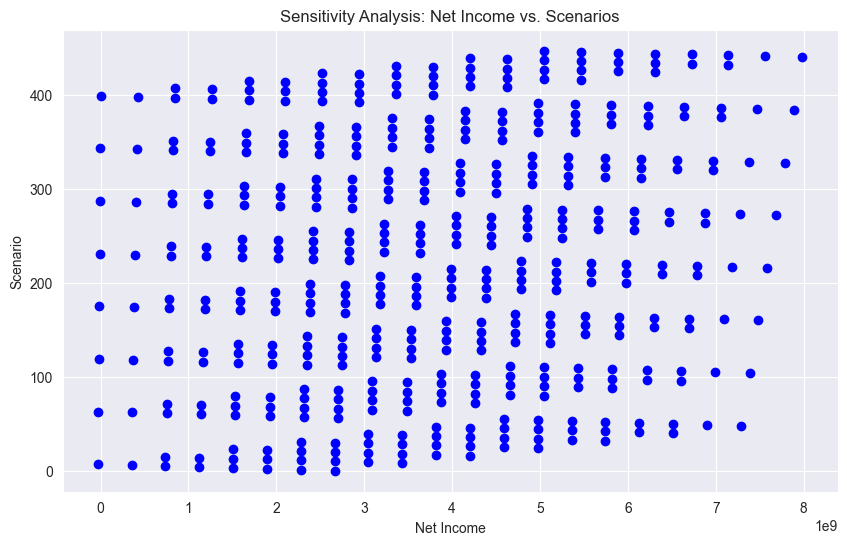

Scenario with the Highest Net Income:
     Sales Volume  Selling Price  Variable Costs  Net Income
440      84000000            140              40  7983335000


In [12]:
# Provide the necessary inputs
units_produced_2022 = 121500000 # assumed total production amount in 2022 based off 2021 (4,500,000) and 2020 (4,000,000) annual reports
total_variable_costs = 6853396000 # from calculation above
variable_costs_per_unit = total_variable_costs / units_produced_2022 # Example variable costs per unit
selling_price_per_unit = 110  # Average selling price per unit

# Define ranges of changes for sensitivity analysis
sales_volume_range = range(77000000, 85000000, 1000000)  # Range of sales volume changes
selling_price_range = range(80, 150, 10)  # Range of selling price changes
variable_costs_range = range(40, 80, 5)  # Range of variable costs changes

# Initialize data storage
sensitivity_data = []

# Perform sensitivity analysis
for sv in sales_volume_range:
    for sp in selling_price_range:
        for vc in variable_costs_range:
            # Calculate total revenue, total variable costs, and net income
            total_revenue = sv * sp
            total_variable_costs = sv * vc
            net_income = total_revenue - total_variable_costs - total_fixed_costs 
            
            sensitivity_data.append((sv, sp, vc, net_income))

# Create a DataFrame to store the sensitivity analysis results
columns = ['Sales Volume', 'Selling Price', 'Variable Costs', 'Net Income']
sensitivity_df = pd.DataFrame(sensitivity_data, columns=columns)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(sensitivity_df['Net Income'], sensitivity_df.index, color='blue', marker='o')
plt.xlabel('Net Income')
plt.ylabel('Scenario')
plt.title('Sensitivity Analysis: Net Income vs. Scenarios')
plt.grid(True)
plt.show()

# Find the scenario with the highest net income
max_net_income_scenario = sensitivity_df[sensitivity_df['Net Income'] == sensitivity_df['Net Income'].max()]
print("Scenario with the Highest Net Income:")
print(max_net_income_scenario)


#### Ideal Scenario with Highest Net Income
- Sales Volume: 84,000,000
- Selling Price: $140
- Variable Costs: $40
- Net Income: $7,983,335,000

In [13]:
print(sensitivity_df)

     Sales Volume  Selling Price  Variable Costs  Net Income
0        77000000             80              40  2663335000
1        77000000             80              45  2278335000
2        77000000             80              50  1893335000
3        77000000             80              55  1508335000
4        77000000             80              60  1123335000
..            ...            ...             ...         ...
443      84000000            140              55  6723335000
444      84000000            140              60  6303335000
445      84000000            140              65  5883335000
446      84000000            140              70  5463335000
447      84000000            140              75  5043335000

[448 rows x 4 columns]


### Discussion of Results and Visualization 

#### Impact of Sales Volume:
The analysis explores a range of sales volume changes, from 77 million units to 84 million units. The results show that as sales volume increases, net income also tends to increase. This is an expected outcome, as higher sales volumes contribute to greater total revenue. The scenario with the highest net income (Sales Volume: 84 million) indicates the potential benefits of expanding market reach or increasing customer demand.

#### Effect of Selling Price:
By varying the selling price per unit between $80 and $140, the analysis demonstrates the impact of pricing decisions on net income. Higher selling prices can lead to increased net income, but there's likely a balance to strike to maintain customer demand. The scenario with the highest net income (Selling Price: $140) highlights the potential advantage of premium pricing under the right conditions.

#### Influence of Variable Costs:
The sensitivity analysis explores the influence of variable costs per unit on net income by considering values between $40 and $75. Lower variable costs can boost net income, as higher profit margins are achieved for each unit sold. The scenario with the highest net income (Variable Costs: $40) suggests that optimizing production costs can significantly impact the company's financial performance.

#### Optimal Scenario:
The scenario with the highest net income involves a combination of factors that are favorable for the company: higher sales volume, a premium selling price, and lower variable costs. This scenario represents an ideal balance between revenue generation and cost management. Identifying such an optimal scenario can guide strategic decisions to maximize profitability.

#### Visual Representation:
The scatter plot visualization allows for a quick overview of the entire sensitivity analysis. Patterns in the data can be observed, such as a general trend of increasing net income with higher sales volume and selling price, as well as decreasing variable costs. This visualization aids in identifying outliers and understanding the relationship between variables.

#### Decision-Making Insights:
The results of the sensitivity analysis provide decision-makers with insights into how changes in key variables impact the company's financial health. These insights can guide pricing strategies, production optimization efforts, and sales projections. The analysis serves as a tool for evaluating potential risks and opportunities associated with different business scenarios.

#### Business Strategy Alignment:
The sensitivity analysis aligns with Lululemon's business objectives, such as improving net income and making informed decisions based on data. The insights gained from this analysis can inform strategies to enhance profitability and guide resource allocation.